In [1]:
# Import dependencies for web scraping, pandas, and matplotlib
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set up Automated Browsing with Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)
html = browser.html

# Scrape HTML Table - Pandas

In [4]:
# (Just for practice)
# Read the html of the site into a pandas DataFrame
mars_temperature_df = pd.read_html(url)
mars_temperature_df[0].head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [5]:
mars_temperature_df[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


# Scrape HTML Table - Splinter and Beautiful Soup

In [6]:
# Parse the html 
mars_soup = soup(html, 'html.parser')

# Find the table
table = mars_soup.find('table', class_='table')

# Get the text of the table headers in a list
header = [val.text for val in table.find_all('th')]

# Go through each table row, get the text of the table data in a list
# If the row list has data (the header row wont), add it to the mars_temp_table list
mars_temp_table = []
rows = table.find_all('tr')
for row in rows:
    row_data = [val.text.strip() for val in row.find_all('td')]
    if row_data:
        mars_temp_table.append(row_data)

browser.quit()
print(header, mars_temp_table)

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure'] [['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'], ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'], ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'], ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'], ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'], ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'], ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'], ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'], ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'], ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'], ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'], ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'], ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'], ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'], ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'], ['170', '2012-09-03', '28', '165', '6', '-75.0', '

In [7]:
# Convert list of lists to a pandas DataFrame, assigning the column headers as the header list
mars_temp_df = pd.DataFrame(mars_temp_table, columns=header)
mars_temp_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [8]:
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [9]:
mars_temp_df = mars_temp_df.astype({'id':'int',
                                    'sol':'int', 
                                    'ls':'int',
                                    'month':'int',
                                    'min_temp':'float',
                                    'pressure':'float'})
mars_temp_df['terrestrial_date'] = pd.to_datetime(mars_temp_df['terrestrial_date'])

In [10]:
mars_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int32         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int32         
 3   ls                1867 non-null   int32         
 4   month             1867 non-null   int32         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 73.1 KB


# Questions

### How many months exist on Mars?
- It appears there are 12 months from 1 to 12.

In [11]:
print(mars_temp_df['month'].unique())
print(len(mars_temp_df['month'].unique()))

[ 6  7  8  9 10 11 12  1  2  3  4  5]
12


### How many Martian (not Earth) days worth of data are there?
- 1867 days of data.

In [12]:
len(mars_temp_df['terrestrial_date'].unique())

1867

### What are the coldest and warmest months on Mars?
- The coldest is month 3 at -83.3, and the warmest is month 8 at -68.4.

In [13]:
temperatures = mars_temp_df.groupby('month')['min_temp'].mean()

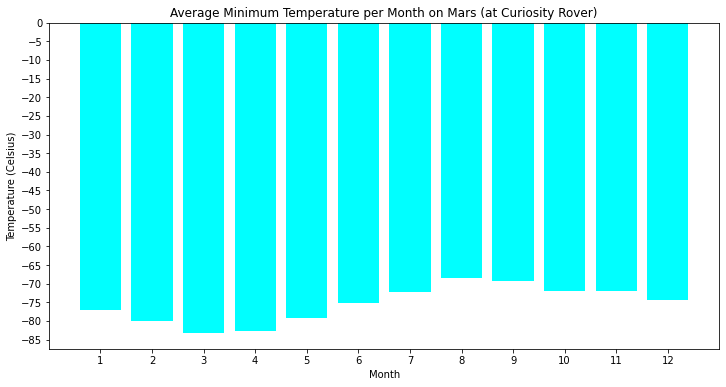

In [14]:
plt.figure(figsize=(12, 6))
plt.bar(temperatures.index, temperatures.values, color='cyan')
plt.xticks(temperatures.index)
plt.yticks(range(0, -90, -5))
plt.title('Average Minimum Temperature per Month on Mars (at Curiosity Rover)')
plt.xlabel('Month')
plt.ylabel('Temperature (Celsius)')
plt.show()

### Which months have the lowest and highest atmospheric pressure on Mars?
- The lowest is month 6 at 745.1, and the highest is month 9 at 913.3.

In [15]:
pressures = mars_temp_df.groupby('month')['pressure'].mean()

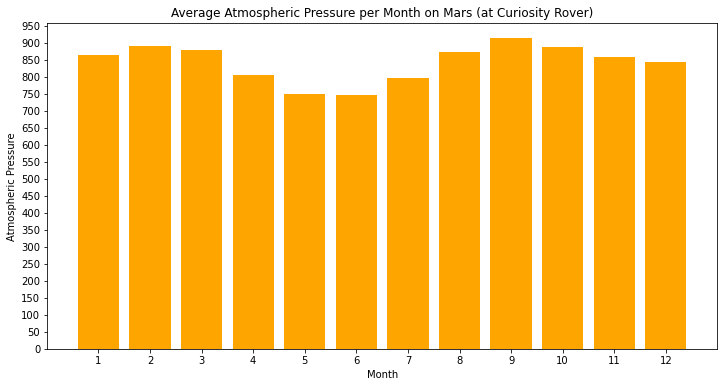

In [16]:
plt.figure(figsize=(12, 6))
plt.bar(pressures.index, pressures.values, color='orange')
plt.xticks(pressures.index)
plt.yticks(range(0, 1000, 50))
plt.title('Average Atmospheric Pressure per Month on Mars (at Curiosity Rover)')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.show()

### About how many terrestrial (Earth) days exist in a Martian year?
- Based on the plot I would estimate a little less than two Earth years, so <730 days. 
- If we calculate based on the dates given, there are about 687 Earth days in the Martian year. 

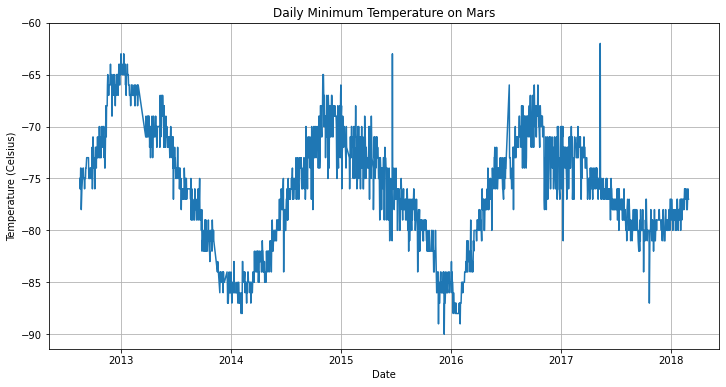

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(mars_temp_df['terrestrial_date'], mars_temp_df['min_temp'])
plt.yticks(range(-60, -95, -5))
plt.grid()
plt.title('Daily Minimum Temperature on Mars')
plt.xlabel('Date')
plt.ylabel('Temperature (Celsius)')
plt.show()

In [18]:
# Calculate the number of days based on the first day of the first Martian month, and the last day of the last month.
start = []
for i, row in mars_temp_df.iterrows():
    if row['month'] == 1 and mars_temp_df.iloc[i - 1]['month'] != 1:
        start.append(row['terrestrial_date'])
        
print(start[1] - start[0])

687 days 00:00:00


In [19]:
mars_temp_df.to_csv('mars_temperature_data.csv', encoding='utf8', index=False)